In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Numerical Differentiation

Often times, we will want to calcaulte the derivative of a function or data set without needing to solve it analytically. We will explore various methods for numerically computing derivatives.

## Finite Difference Approximations

The first derivative at $x$ is defined by using limits as

$$f'(x) = \frac{df(x)}{dx} = \displaystyle{\lim_{\Delta x \to 0}} \frac{\Delta f(x)}{\Delta x}$$

Numerically, $\Delta x$ cannot be infinitesimal, so it should be finite and the solution becomes approximate:

$$f'(x) \approx \frac{f(x + \Delta x) - f(x)}{\Delta x}$$

Discretize the inputs and let

$$x_i = x, ~~~~~ h = \Delta x, ~~~~~ x_{i+1} = x + h, ~~~~~ x_{i-1} = x - h$$

We can approximate the derivative at $x_i$ by either taking a small step forward or backward.

$$\textbf{Forward Difference}: ~~~~~ f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h}$$
$$\textbf{Backward Difference}: ~~~~~ f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{h}$$

By utilizing these difference methods, we can also compute the second derivative. Let the **second derivative** be computed using the *forward difference* approach

$$f''(x_i) \approx \frac{f'(x_{i+1}) - f'(x_i)}{h}$$

Compute the first derivatives in this equation using *backward difference*

$$f'(x_{i+1}) \approx \frac{f(x_{i+1}) - f(x_i)}{h}, ~~~~~ f'(x_{i}) \approx \frac{f(x_i) - f(x_{i-1})}{h}$$

Substituting these equations in we get

$$\textbf{Central Difference}: ~~~~~ f''(x_i) \approx \frac{1}{h}\left[\frac{f(x_{i+1}) - f(x_i)}{h} - \frac{f(x_i) - f(x_{i-1})}{h}\right] = \frac{f(x_{i+1}) - 2f(x_i) + f(x_{i-1})}{h^2}$$

## Example: Forward and backward Difference

Compute the forawrd and backward differences at each of the following data points:

$$x = \begin{bmatrix}
3 \\ 
7 \\ 
11 \\ 
15
\end{bmatrix}, ~~~~~
y = \begin{bmatrix}
7 \\ 
6 \\ 
9 \\ 
6
\end{bmatrix}$$

FORWARD DIFFERENCE:
df at x = 3.0: -0.25
df at x = 7.0: 0.75
df at x = 11.0: -0.75

BACKWARD DIFFERENCE:
df at x = 7.0: -0.25
df at x = 11.0: 0.75
df at x = 15.0: -0.75


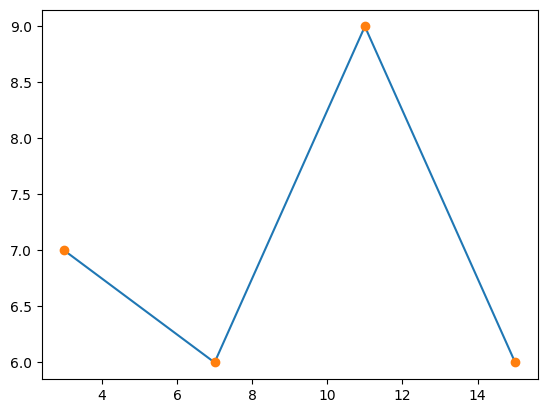

In [5]:
x = np.array([3,7,11,15],dtype=float)
y = np.array([7,6,9,6],dtype=float)
h = 4

print('FORWARD DIFFERENCE:')
for i in range(0,len(x)-1):
    fDiff = (y[i+1] - y[i]) / h
    print(f'df at x = {x[i]}: {fDiff}')

print('\nBACKWARD DIFFERENCE:')
for i in range(1,len(x)):
    bDiff = (y[i] - y[i-1]) / h
    print(f'df at x = {x[i]}: {bDiff}')

plt.plot(x,y,'-')
plt.plot(x,y,'o')
plt.show()

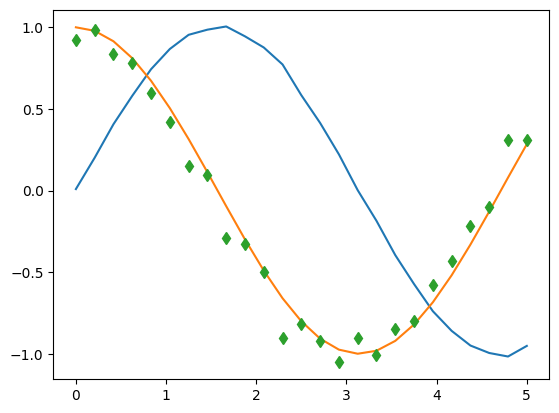

In [12]:
x = np.linspace(0,5,25)
y = np.sin(x) + np.random.normal(0,0.01,25)
dy_true = np.cos(x)
h = x[1] - x[0]

dy_est = np.zeros_like(x)
for i in range(0,len(x)):
    if i < len(x)-1:
        dy_est[i] = (y[i+1] - y[i]) / h
    else:
        dy_est[i] = (y[i] - y[i-1]) / h

plt.plot(x,y)
plt.plot(x,dy_true)
plt.plot(x,dy_est,'d')
plt.show()

## Derivatives by Interpolation

If $f(x)$ is given as a set of discrete data points, interpolation can be a very effective means of computing its derivative. The idea is to approximate the derivative of $f(x)$ with the derivative of the interpolant. This method is particularly useful if the data points are located at uneven intervals of $x$, when the finite difference approximations are not applicable.

Solving an interpolation problem leads to a problem in linear algebra where wh have to solve a matrix if we choose to interpolate with the standard monomial basis. If, instead, we interpolate with the Lagrange basis, there is no need to compute a matrix inverse. Recall the equation for Lagrange interpolation for a polynomial of degree $n$

$$L_n(x) = \sum_{i=1}^{n+1} \left(\prod_{\substack{j=1 \\ i\neq j}}^{n+1} \frac{x-x_{j}}{x_{i} - x_{j}}\right)y_{i}$$

Consider a quadratic interpolation function

$$f(x) = \frac{(x-x_i)(x-x_{i+1})}{(x_{i-1}-x_i)(x_{i-1}-x_{i+1})}y_{i-1} + \frac{(x-x_{i-1})(x-x_{i+1})}{(x_i-x_{i-1})(x_i-x_{i+1})}y_i + \frac{(x-x_i)(x-x_{i-1})}{(x_{i+1}-x_i)(x_{i+1}-x_{i-1})}y_{i+1}$$

If $\Delta h$ is the same for all data points, then

$$f(x) = \frac{x^2-x(x_i+x_{i+1})+x_i x_{i+1}}{2h^2}y_{i-1} - \frac{x^2-x(x_{i-1}+x_{i+1})+x_{i-1} x_{i+1}}{h^2}y_i + \frac{x^2-x(x_i+x_{i-1})+x_i x_{i-1}}{2h^2}y_{i+1}$$

Taking the derivative, we get

$$f'(x) = \frac{2x-(x_i+x_{i+1})}{2h^2}y_{i-1} - \frac{2x-(x_{i-1}+x_{i+1})}{h^2}y_i + \frac{2x-(x_i+x_{i-1})}{2h^2}y_{i+1}$$

Since we decided on a second-order polynomial to interpolate, we require three points to compute the curve and its derivative. Additionally, the derivative is able to be compute at any one of these three points. Using the following relationships,

$$x_{i-1} = x_{i-1} \\
x_i = x_{i-1} + h\\
x_{i+1} = x_{i-1} + 2h$$

we can show that

$$\begin{align}
\textbf{Forward:} ~~~~~ &f'(x_{i-1}) = \frac{-3y_{i-1} + 4y_i - y_{i+1}}{2h} \nonumber \\
\textbf{Center:} ~~~~~ &f'(x_{i}) = \frac{y_{i+1} - y_{i-1}}{2h} \nonumber \\
\textbf{Backward:} ~~~~~ &f'(x_{i+1}) = \frac{y_{i-1} - 4y_i + 3y_{i+1}}{2h} \nonumber \\
\end{align}$$

## Example: Lagrange Interpolation

Compute the forawrd, center, and backward differences at the following data points:

$$x = \begin{bmatrix}
3 \\ 
7 \\ 
11 \\ 
15
\end{bmatrix}, ~~~~~
y = \begin{bmatrix}
7 \\ 
6 \\ 
9 \\ 
6
\end{bmatrix}$$

In [ ]:
# try on your own

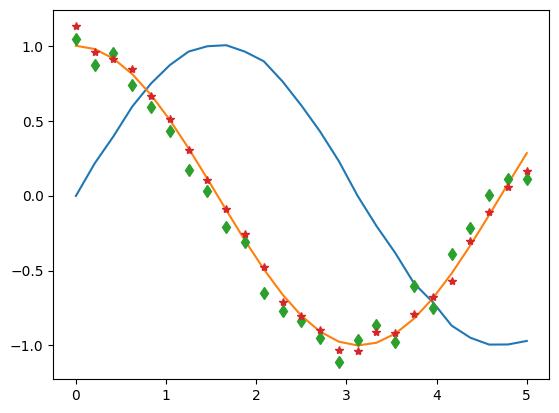

In [14]:
x = np.linspace(0,5,25)
y = np.sin(x) + np.random.normal(0,0.01,25)
dy_true = np.cos(x)
h = x[1] - x[0]

dy_est = np.zeros_like(x) # 2-point difference
for i in range(0,len(x)):
    if i < len(x)-1:
        dy_est[i] = (y[i+1] - y[i]) / h # forward
    else:
        dy_est[i] = (y[i] - y[i-1]) / h # backward

dy_est2 = np.zeros_like(x) # 3-point difference
for i in range(0,len(x)):
    if i == 0:
        dy_est2[i] = (-3*y[i] + 4*y[i+1] - 1*y[i+2]) / (2*h) # forward
    elif i == len(x)-1:
        dy_est2[i] = (1*y[i-2] - 4*y[i-1] + 3*y[i])/ (2*h) # backward
    else:
        dy_est2[i] = (-1*y[i-1] + 1*y[i+1]) / (2*h) # central

plt.plot(x,y)
plt.plot(x,dy_true)
plt.plot(x,dy_est,'d')
plt.plot(x,dy_est2,'*')
plt.show()

## Tayor Series

Consider the forward and backward Taylor series of $f(x)$ about $x$, evaluated at $x_{i+1}$ and $x_{i-1}$

$$\begin{align}
f(x_{i+1}) \overset{\Delta}= f(x+h) &= f(x) + f'(x)h + f''(x)\dfrac{h^2}{2!} + f'''(x)\dfrac{h^3}{3!} + f^{(4)}(x)\dfrac{h^4}{4!} + \ldots \tag{1}\\ \nonumber \\
f(x_{i-1}) \overset{\Delta}= f(x-h) &= f(x) - f'(x)h + f''(x)\dfrac{h^2}{2!} - f'''(x)\dfrac{h^3}{3!} + f^{(4)}(x)\dfrac{h^4}{4!} - \ldots \tag{2}\end{align}$$

Also consider the forward and backward Taylor series of $f(x)$ about $x$, evaluated at $x_{i+2}$ and $x_{i-2}$

$$\begin{align}
f(x_{i+2}) \overset{\Delta}= f(x+2h) &= f(x) + 2f'(x)h + 4f''(x)\dfrac{h^2}{2!} + 8f'''(x)\dfrac{h^3}{3!} + 16f^{(4)}(x)\dfrac{h^4}{4!} + \ldots \tag{3} \\ \nonumber \\
f(x_{i-2}) \overset{\Delta}= f(x-2h) &= f(x) - 2f'(x)h + 4f''(x)\dfrac{h^2}{2!} - 8f'''(x)\dfrac{h^3}{3!} + 16f^{(4)}(x)\dfrac{h^4}{4!} - \ldots \tag{4} \end{align}$$

We can combine these equations to estimate numerical derivatives of different types (forward, backward, centered) as well as the order of magnitude of their errors.

### 2-Point Differences
$$\begin{align}
\textbf{Forward:} ~~~ (1) ~~~ \to ~~~ &f'(x_i) = \frac{(x_{i+1})-f(x_{i})}{h} + \mathcal{O}(h) \nonumber \\ \nonumber \\
\textbf{Backward:} ~~~ (2) ~~~ \to ~~~ &f'(x_i) = \frac{(x_{i})-f(x_{i-1})}{h} + \mathcal{O}(h) \nonumber \\ \nonumber \\
\end{align}$$

### 3-Point Differences
$$\begin{align}
\textbf{Centered:} ~~~ (1),(2) ~~~ \to ~~~ &f'(x_i) = \frac{f(x_{i+1})-f(x_{i-1})}{2h} + \mathcal{O}(h^2) \nonumber \\ \nonumber \\
\textbf{Forward:} ~~~ (1),(3) ~~~ \to ~~~ &f'(x_i) = \frac{-3f(x_{i})+4f(x_{i+1})-f(x_{i+2})}{2h} + \mathcal{O}(h^2) \nonumber \\ \nonumber \\
\textbf{Backward:} ~~~ (2),(4) ~~~ \to ~~~ &f'(x_i) = \frac{3f(x_{i})-4f(x_{i-1})+f(x_{i-2})}{2h} + \mathcal{O}(h^2) \nonumber \\ \nonumber \\
\end{align}$$

## Example: Centered Difference

Compute $y'$ and $y''$ at $x = 0.1$ using the centered difference formulas assuming a constant step size, $h=0.1$, for the following dataset

$$x = \begin{bmatrix}
-0.1 \\ 
0.0 \\ 
0.1 \\ 
0.2 \\
0.3
\end{bmatrix}, ~~~~~
y = \begin{bmatrix}
-2.001 \\ 
-2.000 \\ 
-1.999 \\ 
-1.992 \\
-1.993
\end{bmatrix}$$